<a href="https://colab.research.google.com/github/Jwainlee/python-baby/blob/main/CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(Convolution Neural Network)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Convolition Layer

> Conv1D, Conv2D, Conv3D   
> SeparableConv1D, SeparableConv2D   
> DepthwiseConv2D, Conv2DTranspose, Conv3DTransopse

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
shape = (4, 28, 28, 3)
x = tf.random.normal(shape)
y = tf.keras.layers.Conv2D(2, 3, activation = 'relu', input_shape = shape[1:])(x)
print(y.shape)

(4, 26, 26, 2)


In [11]:
shape[1:]

(28, 28, 3)

## Pooling Layer

> MaxPooling1D, MaxPooling2D   
> AveragePooling1D, AveragePooling2D   
> GlobalMaxPooling1D, GlobalMaxPooling2D   
> GlobalAveragePooling1D, GlobalAveragePooling2D

In [12]:
x = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x.shape)
x = tf.reshape(x, [1, 3, 3, 1])
print(x)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid')
print(max_pool_2d(x))

(3, 3)
tf.Tensor(
[[[[1]
   [2]
   [3]]

  [[4]
   [5]
   [6]]

  [[7]
   [8]
   [9]]]], shape=(1, 3, 3, 1), dtype=int32)
tf.Tensor(
[[[[5]
   [6]]

  [[8]
   [9]]]], shape=(1, 2, 2, 1), dtype=int32)


In [13]:
(train_img, train_lab), (test_img, test_lab) = keras.datasets.mnist.load_data()
print(train_img.shape)
print(test_img.shape)

(60000, 28, 28)
(10000, 28, 28)


In [14]:
train_img = train_img.reshape((60000, 28, 28, 1))
test_img = test_img.reshape((10000, 28, 28, 1))

In [15]:
train_img[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [16]:
train_img, test_img = train_img / 255, test_img / 255

In [18]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = train_img[0].shape))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [20]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_img, train_lab, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1488 - accuracy: 0.9537
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0475 - accuracy: 0.9848
Epoch 3/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0338 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0255 - accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0208 - accuracy: 0.9935


**모델 저장 / 재사용**

In [ ]:
model.save('./my_model.hdf5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('./my_model.hdf5')

## All

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
path = './cnn.hdf5'
checkpointer = ModelCheckpoint(filepath = path, monitor = 'val_loss', verbose = 1,
                               save_best_only = True)
early_stop_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.25, epochs = 30, batch_size = 200,
                    verbose = 0, callbacks = [early_stop_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.07707, saving model to ./cnn.hdf5

Epoch 2: val_loss improved from 0.07707 to 0.05604, saving model to ./cnn.hdf5

Epoch 3: val_loss improved from 0.05604 to 0.04803, saving model to ./cnn.hdf5

Epoch 4: val_loss improved from 0.04803 to 0.04469, saving model to ./cnn.hdf5

Epoch 5: val_loss improved from 0.04469 to 0.04174, saving model to ./cnn.hdf5

Epoch 6: val_loss did not improve from 0.04174

Epoch 7: val_loss did not improve from 0.04174

Epoch 8: val_loss did not improve from 0.04174

Epoch 9: val_loss improved from 0.04174 to 0.04132, saving model to ./cnn.hdf5

Epoch 10: val_loss did not improve from 0.04132

Epoch 11: val_loss improved from 0.04132 to 0.04126, saving model to ./cnn.hdf5

Epoch 12: val_loss did not improve from 0.04126

Epoch 13: val_loss did not improve from 0.04126

Epoch 14: val_loss did not improve from 0.04126

Epoch 15: val_loss did not improve from 0.04126

Epoch 16: val_loss did not improve from 0.04126

Epoc

313/313 [==============================] - 10s 30ms/step - loss: 0.0334 - accuracy: 0.9922
0.9922000169754028


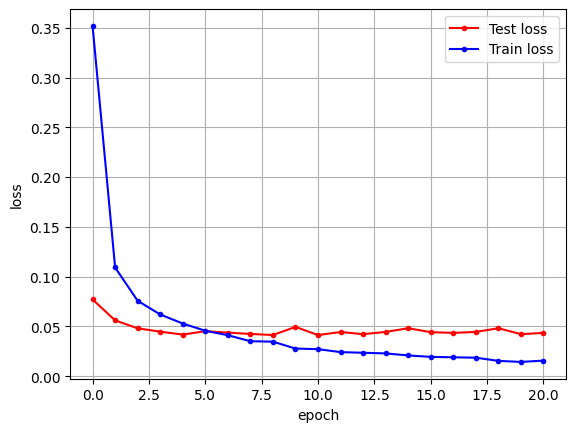

In [ ]:
print(model.evaluate(x_test, y_test)[1])
vloss = history.history['val_loss']
loss = history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, vloss, marker = '.', c = 'red', label = 'Test loss')
plt.plot(x_len, loss, marker = '.', c = 'blue', label = 'Train loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()